In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import psycopg2

# ------- Modelagem -------- #
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:

def tabela(comando, conexao):
    k = 0
    while k ==0:
        tab = pd.read_sql(comando,conexao)
        k = 1
    else:
        pass
    return tab

In [9]:
conn = psycopg2.connect(
    host = 'localhost',
    port='XXXX',
    database = 'Books',
    user = 'postgres',
    password = 'XXXX')

In [10]:

df = pd.read_sql('SELECT * FROM public."Books_Data"', conn)


In [11]:
df.head()


,nome_livro,valor,nota,em_estoque,classificacao,comentarios
0,A Light in the Attic,£51.77,3,In stock (22 available),Poetry,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,£53.74,1,In stock (20 available),Historical Fiction,"""Erotic and absorbing...Written with starling ..."
2,Soumission,£50.10,1,In stock (20 available),Fiction,"Dans une France assez proche de la nôtre, un h..."
3,Sharp Objects,£47.82,4,In stock (20 available),Mystery,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,£54.23,5,In stock (20 available),History,From a renowned historian comes a groundbreaki...


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nome_livro     1000 non-null   object
 1   valor          1000 non-null   object
 2   nota           1000 non-null   int64 
 3   em_estoque     1000 non-null   object
 4   classificacao  1000 non-null   object
 5   comentarios    1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [13]:
df['Quantidade_em_estoque']= df['em_estoque'].str.replace('In stock', '').str.replace('(','').str.replace(' available','').str.replace(')', '')


C:\Users\degio\AppData\Local\Temp/ipykernel_20612/332418820.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Quantidade_em_estoque']= df['em_estoque'].str.replace('In stock', '').str.replace('(','').str.replace(' available','').str.replace(')', '')


In [14]:
df['valor'] = df['valor'].str.replace('£', '')
df.drop('em_estoque', inplace = True, axis = 1)
df


,nome_livro,valor,nota,classificacao,comentarios,Quantidade_em_estoque
0,A Light in the Attic,51.77,3,Poetry,It's hard to imagine a world without A Light i...,22
1,Tipping the Velvet,53.74,1,Historical Fiction,"""Erotic and absorbing...Written with starling ...",20
2,Soumission,50.10,1,Fiction,"Dans une France assez proche de la nôtre, un h...",20
3,Sharp Objects,47.82,4,Mystery,"WICKED above her hipbone, GIRL across her hear...",20
4,Sapiens: A Brief History of Humankind,54.23,5,History,From a renowned historian comes a groundbreaki...,20
...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1,Classics,\n\n\n\n\n\n,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4,Sequential Art,High school student Kei Nagai is struck dead i...,1
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5,Historical Fiction,"In England’s Regency era, manners and elegance...",1
998,1st to Die (Women's Murder Club #1),53.98,1,Mystery,"James Patterson, bestselling author of the Ale...",1


In [15]:
df = df.astype({'valor': 'float', 'Quantidade_em_estoque': 'int64'})
df.head()


,nome_livro,valor,nota,classificacao,comentarios,Quantidade_em_estoque
0,A Light in the Attic,51.77,3,Poetry,It's hard to imagine a world without A Light i...,22
1,Tipping the Velvet,53.74,1,Historical Fiction,"""Erotic and absorbing...Written with starling ...",20
2,Soumission,50.10,1,Fiction,"Dans une France assez proche de la nôtre, un h...",20
3,Sharp Objects,47.82,4,Mystery,"WICKED above her hipbone, GIRL across her hear...",20
4,Sapiens: A Brief History of Humankind,54.23,5,History,From a renowned historian comes a groundbreaki...,20


<AxesSubplot:xlabel='count', ylabel='classificacao'>

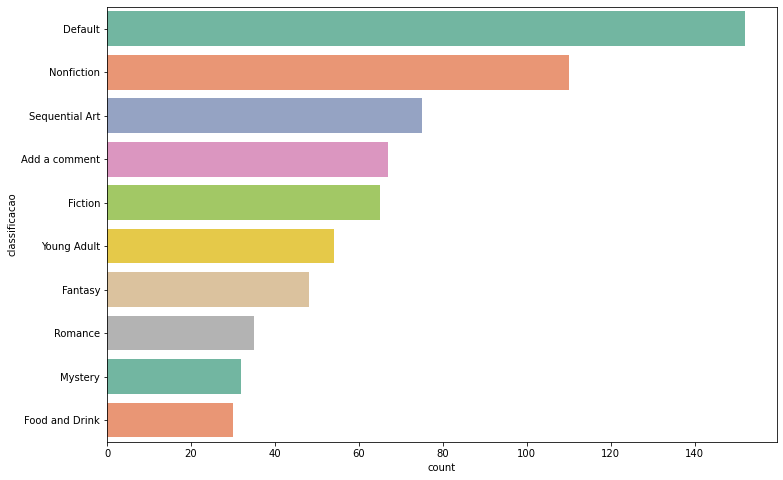

In [16]:
plt.figure(figsize = (12,8))
sns.countplot(y = 'classificacao', data = df, order = df['classificacao'].value_counts().index[:10], palette='Set2')


<AxesSubplot:xlabel='Quantidade_em_estoque', ylabel='Count'>

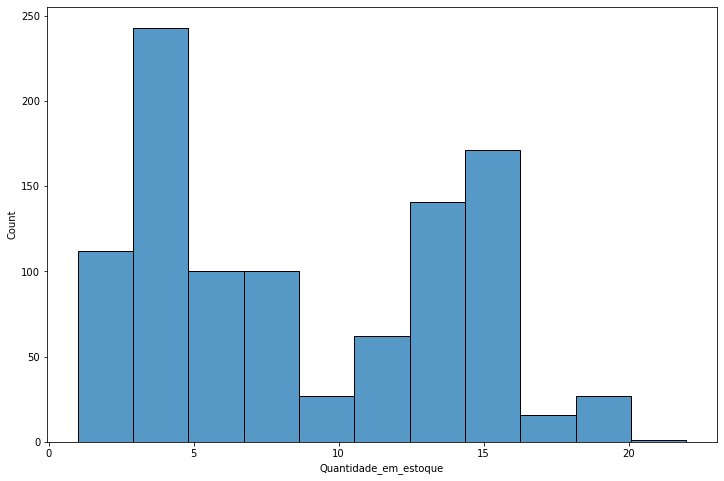

In [17]:
plt.figure(figsize = (12,8))
sns.histplot(x = 'Quantidade_em_estoque', data = df, palette='Set2')


<AxesSubplot:xlabel='nota', ylabel='count'>

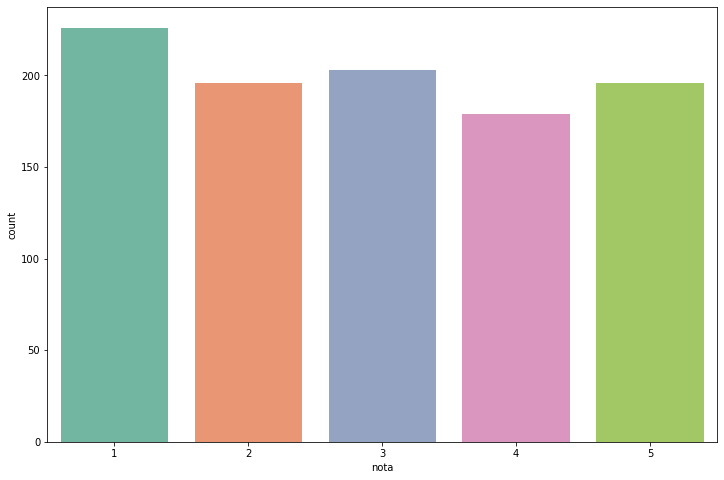

In [18]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'nota', data = df, palette='Set2')
## Aparentemente bem distribuidos

<AxesSubplot:xlabel='valor', ylabel='Count'>

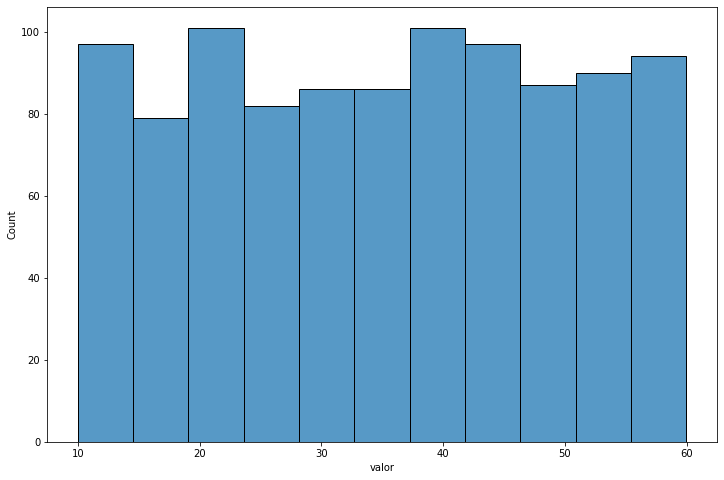

In [19]:

plt.figure(figsize = (12,8))
sns.histplot(x = 'valor', data = df, palette='Set2')

## Mega bem distribuidos, quase que uniforme

In [20]:
df.head()

,nome_livro,valor,nota,classificacao,comentarios,Quantidade_em_estoque
0,A Light in the Attic,51.77,3,Poetry,It's hard to imagine a world without A Light i...,22
1,Tipping the Velvet,53.74,1,Historical Fiction,"""Erotic and absorbing...Written with starling ...",20
2,Soumission,50.10,1,Fiction,"Dans une France assez proche de la nôtre, un h...",20
3,Sharp Objects,47.82,4,Mystery,"WICKED above her hipbone, GIRL across her hear...",20
4,Sapiens: A Brief History of Humankind,54.23,5,History,From a renowned historian comes a groundbreaki...,20


In [21]:
df_CB = pd.concat([df.drop('classificacao', axis = 1),pd.get_dummies(df['classificacao'])], axis = 1).set_index('nome_livro').drop('comentarios', axis = 1)


In [22]:
jaccard_distance = pdist(metric = 'jaccard', X = df_CB)
jaccard_distance_sqre = squareform(jaccard_distance)
jaccard_distance_sqre

jaccard_similatiry = 1 - jaccard_distance_sqre 
jaccard_similatiry


array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.4 , ..., 0.25, 0.2 , 0.  ],
       [0.  , 0.4 , 1.  , ..., 0.  , 0.2 , 0.  ],
       ...,
       [0.  , 0.25, 0.  , ..., 1.  , 0.2 , 0.4 ],
       [0.  , 0.2 , 0.2 , ..., 0.2 , 1.  , 0.2 ],
       [0.  , 0.  , 0.  , ..., 0.4 , 0.2 , 1.  ]])

In [23]:
tabela_similaridade_livros = pd.DataFrame(index = df_CB.index, columns= df_CB.index, data = jaccard_similatiry)


In [24]:
tabela_similaridade_livros.head()


nome_livro,A Light in the Attic,Tipping the Velvet,Soumission,Sharp Objects,Sapiens: A Brief History of Humankind,The Requiem Red,The Dirty Little Secrets of Getting Your Dream Job,"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,The Black Maria,...,Bridget Jones's Diary (Bridget Jones #1),Bounty (Colorado Mountain #7),Blood Defense (Samantha Brinkman #1),"Bleach, Vol. 1: Strawberry and the Soul Reapers (Bleach #1)",Beyond Good and Evil,Alice in Wonderland (Alice's Adventures in Wonderland #1),"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",A Spy's Devotion (The Regency Spies of London #1),1st to Die (Women's Murder Club #1),"1,000 Places to See Before You Die"
nome_livro,,,,,,,,,,,,,,,,,,,,,
A Light in the Attic,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.25,...,0.0,0.0,0.20,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Tipping the Velvet,0.0,1.0,0.4,0.2,0.2,0.2,0.0,0.0,0.0,0.20,...,0.2,0.0,0.00,0.0,0.2,0.2,0.0,0.25,0.20,0.0
Soumission,0.0,0.4,1.0,0.2,0.2,0.2,0.0,0.0,0.0,0.20,...,0.2,0.0,0.00,0.0,0.2,0.2,0.0,0.00,0.20,0.0
Sharp Objects,0.0,0.2,0.2,1.0,0.2,0.0,0.2,0.0,0.2,0.00,...,0.0,0.2,0.25,0.0,0.0,0.0,0.2,0.00,0.25,0.0
Sapiens: A Brief History of Humankind,0.0,0.2,0.2,0.2,1.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.2,0.0,0.0,0.0,0.20,0.00,0.2


In [25]:
pd.melt(tabela_similaridade_livros, value_vars= tabela_similaridade_livros.columns, ignore_index= False)


,nome_livro,value
nome_livro,,
A Light in the Attic,A Light in the Attic,1.0
Tipping the Velvet,A Light in the Attic,0.0
Soumission,A Light in the Attic,0.0
Sharp Objects,A Light in the Attic,0.0
Sapiens: A Brief History of Humankind,A Light in the Attic,0.0
...,...,...
Alice in Wonderland (Alice's Adventures in Wonderland #1),"1,000 Places to See Before You Die",0.2
"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)","1,000 Places to See Before You Die",0.2
A Spy's Devotion (The Regency Spies of London #1),"1,000 Places to See Before You Die",0.4


In [26]:
tabela_similaridade_livros['A Light in the Attic'].sort_values(ascending= False)


nome_livro
A Light in the Attic                                                   1.00
Slow States of Collapse: Poems                                         0.50
Shakespeare's Sonnets                                                  0.25
The Crossover                                                          0.25
Quarter Life Poetry: Poems for the Young, Broke and Hangry             0.25
                                                                       ... 
Stars Above (The Lunar Chronicles #4.5)                                0.00
Love, Lies and Spies                                                   0.00
Raspberry Pi Electronics Projects for the Evil Genius                  0.00
Quench Your Own Thirst: Business Lessons Learned Over a Beer or Two    0.00
1,000 Places to See Before You Die                                     0.00
Name: A Light in the Attic, Length: 1000, dtype: float64

In [27]:
df.head()
df[df['nome_livro'] == "Alice in Wonderland (Alice's Adventures in Wonderland #1)"]


,nome_livro,valor,nota,classificacao,comentarios,Quantidade_em_estoque
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1,Classics,\n\n\n\n\n\n,1


In [28]:
TI_IDF = TfidfVectorizer(min_df = 6, max_df = 0.7)


In [29]:
bag = TI_IDF.fit_transform(df['comentarios'])


In [30]:
TI_IDF.get_feature_names()[0:10]


['000', '10', '100', '11', '12', '13', '14', '15', '150', '17']

In [31]:
matriz_principal = pd.DataFrame(bag.toarray(), columns=TI_IDF.get_feature_names(), index = df['nome_livro'])
matriz_principal.head()


,000,10,100,11,12,13,14,15,150,17,...,yet,york,you,young,younger,youngest,your,yourself,youth,zero
nome_livro,,,,,,,,,,,,,,,,,,,,,
A Light in the Attic,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.176485,0.000000,0.0,0.0,0.054008,0.0,0.0,0.0
Tipping the Velvet,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.116549,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Soumission,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Sharp Objects,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.038468,0.0,0.0,0.000000,0.0,0.0,0.0
Sapiens: A Brief History of Humankind,0.063265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.088654,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [32]:
similaridade_descricao = cosine_similarity(matriz_principal)
similaridade_descricao = pd.DataFrame(data = similaridade_descricao, index = df['nome_livro'], columns= df['nome_livro'])
similaridade_descricao.head()


nome_livro,A Light in the Attic,Tipping the Velvet,Soumission,Sharp Objects,Sapiens: A Brief History of Humankind,The Requiem Red,The Dirty Little Secrets of Getting Your Dream Job,"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,The Black Maria,...,Bridget Jones's Diary (Bridget Jones #1),Bounty (Colorado Mountain #7),Blood Defense (Samantha Brinkman #1),"Bleach, Vol. 1: Strawberry and the Soul Reapers (Bleach #1)",Beyond Good and Evil,Alice in Wonderland (Alice's Adventures in Wonderland #1),"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",A Spy's Devotion (The Regency Spies of London #1),1st to Die (Women's Murder Club #1),"1,000 Places to See Before You Die"
nome_livro,,,,,,,,,,,,,,,,,,,,,
A Light in the Attic,1.000000,0.000000,0.0,0.039487,0.021565,0.006349,0.032401,0.079999,0.041187,0.098760,...,0.058615,0.044012,0.027938,0.010801,0.076365,0.0,0.007039,0.014360,0.021304,0.046113
Tipping the Velvet,0.000000,1.000000,0.0,0.117525,0.014409,0.107130,0.032751,0.075096,0.050492,0.076010,...,0.077815,0.071446,0.085529,0.022272,0.026726,0.0,0.042943,0.087911,0.090009,0.083494
Soumission,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.012894,0.000000,0.009684,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Sharp Objects,0.039487,0.117525,0.0,1.000000,0.063223,0.116766,0.060363,0.182938,0.042948,0.158333,...,0.069065,0.215757,0.180887,0.066286,0.038789,0.0,0.034642,0.061908,0.154982,0.023094
Sapiens: A Brief History of Humankind,0.021565,0.014409,0.0,0.063223,1.000000,0.019406,0.031122,0.105494,0.038860,0.097041,...,0.038445,0.060828,0.034421,0.020874,0.027903,0.0,0.065888,0.021210,0.067402,0.056055


In [33]:
similaridade_descricao["Alice in Wonderland (Alice's Adventures in Wonderland #1)"].sort_values(ascending= False)


nome_livro
A Light in the Attic                                                                    0.0
Outlander (Outlander #1)                                                                0.0
The Passion of Dolssa                                                                   0.0
The Jazz of Physics: The Secret Link Between Music and the Structure of the Universe    0.0
The Hunger Games (The Hunger Games #1)                                                  0.0
                                                                                       ... 
Brain on Fire: My Month of Madness                                                      0.0
Batman: Europa                                                                          0.0
Angels Walking (Angels Walking #1)                                                      0.0
Barefoot Contessa Back to Basics                                                        0.0
1,000 Places to See Before You Die                                   

In [34]:
df1 = pd.melt(tabela_similaridade_livros, value_vars= tabela_similaridade_livros.columns, ignore_index= False)
df1.index.names = ['Livro_1']
df2 = pd.melt(similaridade_descricao, value_vars= similaridade_descricao.columns, ignore_index= False)
df2.index.names = ['Livro_1']


In [35]:
df1_ = df1.reset_index()
df2_ = df2.reset_index()

df_Final = df1_.merge(df2_, how = 'inner', on =['Livro_1', 'nome_livro'])
df_Final.rename(columns = {'value_x': 'Content_based', 'value_y': 'Description_based'}, inplace= True)
df_Final


,Livro_1,nome_livro,Content_based,Description_based
0,A Light in the Attic,A Light in the Attic,1.0,1.000000
1,Tipping the Velvet,A Light in the Attic,0.0,0.000000
2,Soumission,A Light in the Attic,0.0,0.000000
3,Sharp Objects,A Light in the Attic,0.0,0.039487
4,Sapiens: A Brief History of Humankind,A Light in the Attic,0.0,0.021565
...,...,...,...,...
1003999,Alice in Wonderland (Alice's Adventures in Won...,"1,000 Places to See Before You Die",0.2,0.000000
1004000,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)","1,000 Places to See Before You Die",0.2,0.021468
1004001,A Spy's Devotion (The Regency Spies of London #1),"1,000 Places to See Before You Die",0.4,0.020323
1004002,1st to Die (Women's Murder Club #1),"1,000 Places to See Before You Die",0.2,0.053774


In [36]:
df_Final['Valor de Recomendação'] = (df_Final['Content_based'] + df_Final['Description_based'])/2


In [37]:
valor_similar = 0.1
filtro = ((df_Final['Valor de Recomendação'] > valor_similar) & (round(df_Final['Valor de Recomendação'],0) != 1))
df_Final[filtro]


,Livro_1,nome_livro,Content_based,Description_based,Valor de Recomendação
7,The Coming Woman: A Novel Based on the Life of...,A Light in the Attic,0.20,0.079999,0.139999
9,The Black Maria,A Light in the Attic,0.25,0.098760,0.174380
11,Shakespeare's Sonnets,A Light in the Attic,0.25,0.113198,0.181599
15,Our Band Could Be Your Life: Scenes from the A...,A Light in the Attic,0.20,0.074660,0.137330
16,Olio,A Light in the Attic,0.25,0.087103,0.168552
...,...,...,...,...,...
1003997,"Bleach, Vol. 1: Strawberry and the Soul Reaper...","1,000 Places to See Before You Die",0.40,0.024143,0.212071
1003998,Beyond Good and Evil,"1,000 Places to See Before You Die",0.20,0.042183,0.121092
1004000,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)","1,000 Places to See Before You Die",0.20,0.021468,0.110734
1004001,A Spy's Devotion (The Regency Spies of London #1),"1,000 Places to See Before You Die",0.40,0.020323,0.210161
